<a href="https://colab.research.google.com/github/andreyprm/Final-Project-Purwadhika-Bandung-DS---02/blob/master/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [5]:
import io
ad_data = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

**Check the head of ad_data**

In [11]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [12]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [13]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


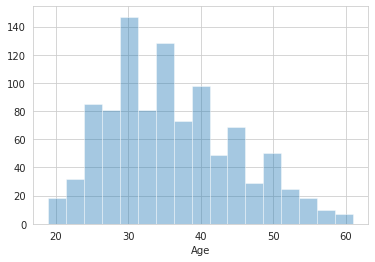

In [14]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'], kde=False)

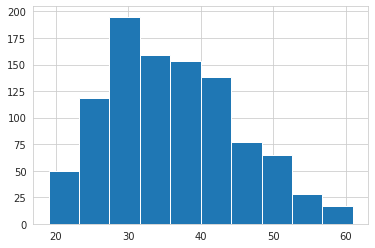

In [15]:
ad_data['Age'].hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


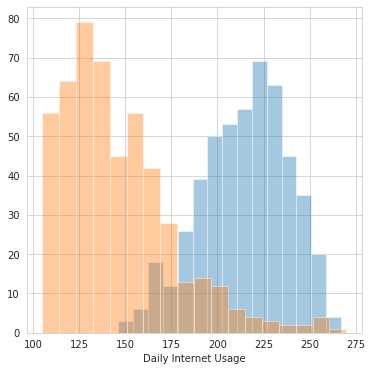

In [53]:
plt.figure(figsize=(6,6))
sns.distplot(ad_data[ad_data['Clicked on Ad'] == 0]['Daily Internet Usage'], kde=False)
sns.distplot(ad_data[ad_data['Clicked on Ad'] == 1]['Daily Internet Usage'], kde=False)
plt.show()

**Create a jointplot showing Area Income versus Age.**

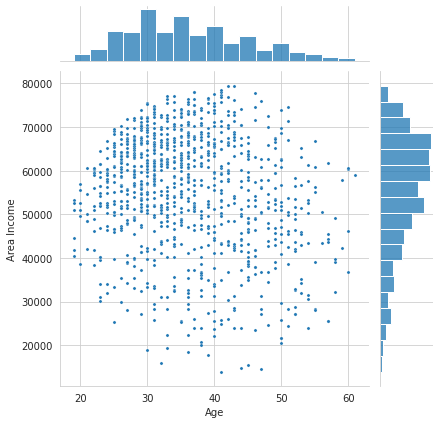

In [16]:
sns.jointplot(data=ad_data, x='Age',y='Area Income', s=10)


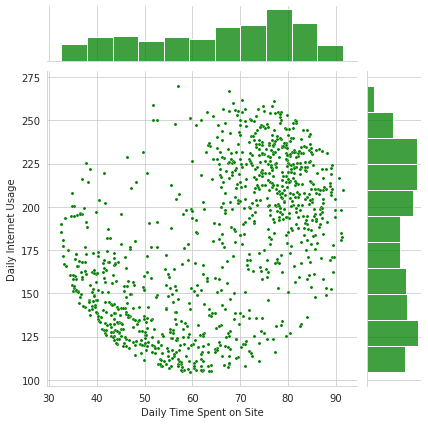

In [17]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site',y='Daily Internet Usage', color='g', s=10)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1184: UserWarning: The following kwargs were not used by contour: 'marker'
  **contour_kws,


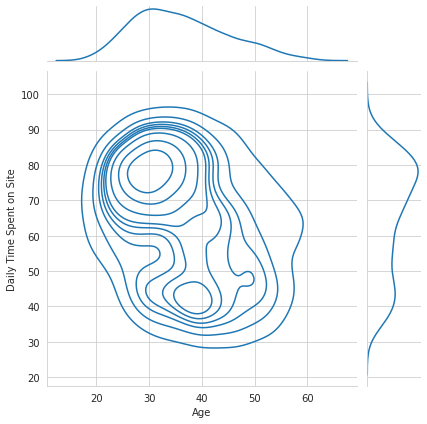

In [18]:
x = sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='kde', marker="+")
# x.plot_joint(plt.scatter, c="k", s=30, linewidth=1, marker=".")

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

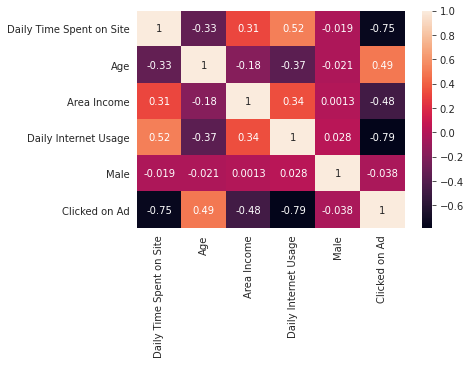

In [19]:
sns.heatmap(ad_data.corr(), annot=True)
plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [20]:
# - Yes/No -> Label Encode Yes = 1, N0=0

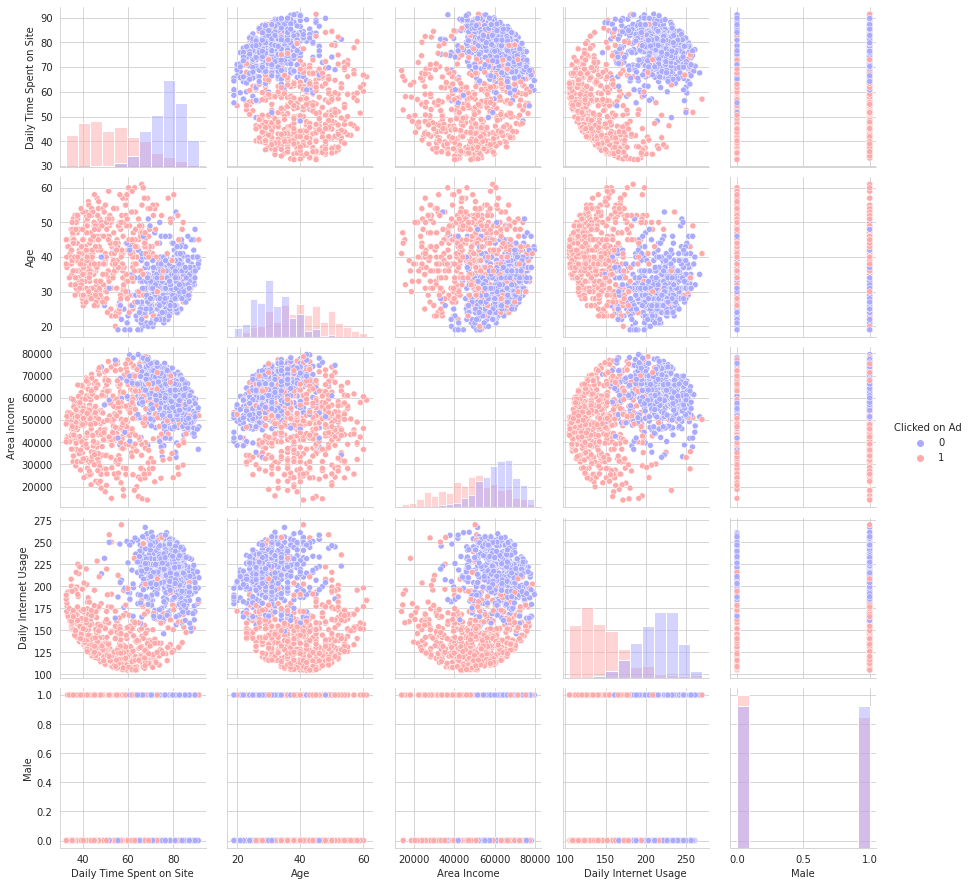

In [21]:
sns.pairplot(ad_data, diag_kind='hist', palette='bwr', hue='Clicked on Ad')

In [22]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [24]:
# setting feature and target
feature = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']]
target = ad_data['Clicked on Ad'].apply(lambda x: 'No' if x == 0 else 'Yes')

** Train and fit a logistic regression model on the training set.**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=101)

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluations
** Now predict values for the testing data.**

In [38]:
prediction_test = model.predict(X_test)

** Create a classification report for the model.**

In [39]:
print(confusion_matrix(y_test, prediction_test))

[[150   7]
 [  6 137]]


In [40]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96       157
         Yes       0.95      0.96      0.95       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



### Confusion Matrix

In [41]:
pd.DataFrame(data=confusion_matrix(y_test,prediction_test), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])

,P No,P Yes
A No,150,7
A Yes,6,137


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test,prediction_test).ravel()
(tn, fp, fn, tp)


(150, 7, 6, 137)

### AUROC Graph

In [44]:
proba = model.predict_proba(X_test)

In [45]:
probs = proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs, pos_label='Yes')
roc_auc = auc(fpr, tpr)

Text(0, 0.5, 'True Positive Rate')

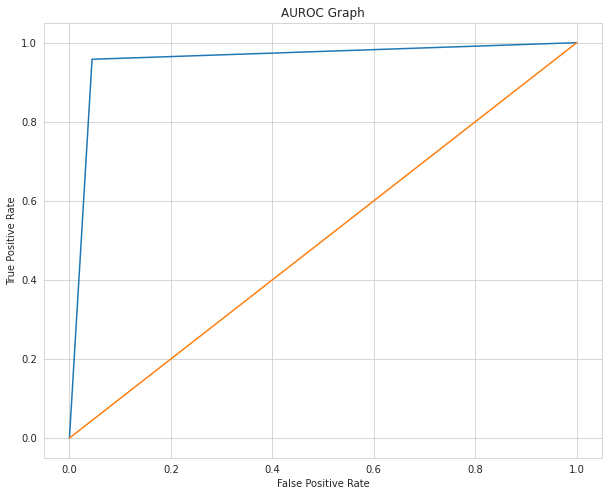

In [46]:
plt.figure(figsize=(10,8))
plt.title('AUROC Graph')
plt.plot(fpr, tpr, label='AUC : {}'.format(round(roc_auc,2)))
plt.plot([0,1])
# plt.xlim([0,1])
# plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


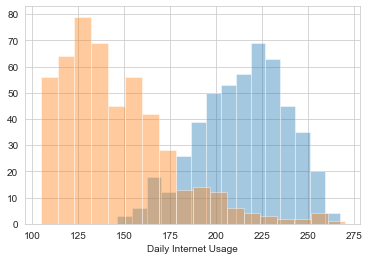